In [51]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score

In [2]:
df = pd.read_csv("dataset_32_pendigits.csv")
df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


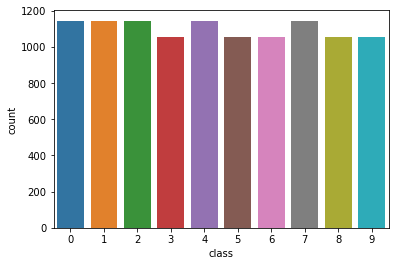

In [3]:
sns.countplot(x = df["class"]);

In [4]:
normalized_df =pd.DataFrame()
for i in df.columns[:-1]:
    normalized_df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
normalized_df['class'] = df['class']
normalized_df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.23,0.56,0.53,1.00,0.90,0.40,0.98,8
1,0.00,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.15,0.37,0.00,0.69,0.02,1.00,0.06,2
2,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00,1
3,0.00,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.34,1.00,0.45,0.74,0.23,0.67,0.00,4
4,0.00,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.60,0.40,0.40,0.33,0.20,0.47,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0.36,1.00,0.24,0.70,0.00,0.38,0.49,0.33,0.95,0.47,0.87,0.55,0.96,0.21,1.00,0.00,4
10988,0.16,0.75,0.41,1.00,0.52,0.64,0.32,0.27,0.00,0.00,0.21,0.09,0.62,0.02,1.00,0.14,2
10989,0.56,1.00,0.27,0.79,0.00,0.39,0.12,0.00,0.66,0.15,1.00,0.51,0.93,0.93,0.38,0.93,0
10990,0.19,1.00,0.00,0.61,0.03,0.23,0.48,0.00,0.97,0.27,1.00,0.66,0.62,0.97,0.10,0.81,0


**Sem balanceamento e Sem GS**

In [66]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    results = pd.DataFrame(columns=["ACC","F1"])
    model.fit(X_train, y_train)
    new_row = {"ACC":balanced_accuracy_score(y_test, model.predict(X_test)),"F1":f1_score(y_test, model.predict(X_test), average='weighted') }




    return new_row

In [67]:

kf = StratifiedKFold(n_splits=2)
X = normalized_df.drop('class', axis=1).values
y = normalized_df['class'].values
kf.get_n_splits(X,y)

metrics = ["ACC","F1"]

df_knn = pd.DataFrame(columns=metrics)
df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_np = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    model = KNeighborsClassifier(n_neighbors=7)
    df_knn =df_knn.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
     
    model = DecisionTreeClassifier()
    df_tree = df_tree.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
    
    
    model = MLPClassifier(hidden_layer_sizes=(64,64,64), 
                    activation='tanh', solver='sgd',
                    alpha=0.0001,
                    learning_rate='adaptive', max_iter=1000)
    df_mlp  = df_mlp.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True)
    
    
    
    model = GaussianNB()
    df_np = df_np.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    
    
    
    model = LogisticRegression(solver='liblinear')
    df_reg_log = df_reg_log.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    

In [68]:
df_knn

,ACC,F1
0,0.979325,0.979385
1,0.980635,0.980349


In [69]:
df_tree

,ACC,F1
0,0.943033,0.942992
1,0.925315,0.925723


In [70]:
df_mlp

,ACC,F1
0,0.978626,0.978703
1,0.966470,0.965977


In [71]:
df_np

,ACC,F1
0,0.840503,0.835536
1,0.845110,0.842325


In [75]:
df_reg_log

,ACC,F1
0,0.914481,0.914677
1,0.890361,0.889264
